In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2%}'.format

In [31]:
_25 = pd.read_csv("over_25.csv")
_reg19 = pd.read_csv("ugp_reg_2019.csv")
_tui = pd.read_csv("tuition.csv")
_enr = pd.read_csv("enrollment.csv")
_25.dropna(inplace = True)

In [32]:
def set_index(df, bool1, bool2, index):
    # Resets index of dataframe to specified number
    # Includes 'drop' and 'inplace' specifiers
    df.reset_index(drop=bool1, inplace=bool2)
    df.index += index  
    return df

In [34]:
_reg19["%hsp"] = _reg19["Hispanic/Latino, any race"].div(_reg19["Students"].values, fill_value=0)
_reg19["%blk"] = _reg19["Black/African American"].div(_reg19["Students"].values, fill_value=0)
_reg19["%ntv"] = _reg19["American Indian or Alaska Native"].div(_reg19["Students"].values, fill_value=0)
_reg19["%npi"] = _reg19["Native Hawaiian or Pacific Islander"].div(_reg19["Students"].values, fill_value=0)
_reg19["%asn"] = _reg19["Asian"].div(_reg19["Students"].values, fill_value=0)
_reg19["%wht"] = _reg19["White"].div(_reg19["Students"].values, fill_value=0)
_reg19["%_x2"] = _reg19["Two or More Races"].div(_reg19["Students"].values, fill_value=0)
_reg19["%nra"] = _reg19["Foreign/Non-Resident Alien"].div(_reg19["Students"].values, fill_value=0)
_reg19["%unk"] = _reg19["Unknown"].div(_reg19["Students"].values, fill_value=0)
_reg19["%m"] = _reg19["Male"].div(_reg19["Students"].values, fill_value=0)
_reg19["%f"] = _reg19["Female"].div(_reg19["Students"].values, fill_value=0)
_reg19["%lower"] = _reg19["Lower Division Certificate"].div(_reg19["Students"].values, fill_value=0)
_reg19["%assc"] = _reg19["Associate"].div(_reg19["Students"].values, fill_value=0)
_reg19["%bach"] = _reg19["Bachelor's"].div(_reg19["Students"].values, fill_value=0)
_reg19["%mstr"] = _reg19["Master's"].div(_reg19["Students"].values, fill_value=0)
_reg19["%doct"] = _reg19["Doctorate"].div(_reg19["Students"].values, fill_value=0)

deg_perc = set_index(_reg19.filter(['Institution','INST','Students','%lower','%assc', '%bach', 
                           '%mstr', '%doct'], axis=1).sort_values(by="Students", ascending=False, inplace=False),True, True, 1)

comcol = deg_perc.loc[deg_perc['INST'] == "CC"] 
comcol.head(10)

,Institution,INST,Students,%lower,%assc,%bach,%mstr,%doct
5,Montgomery College,CC,21260,1.05%,13.16%,0.00%,0.00%,0.00%
6,Community College of Baltimore County,CC,17732,4.19%,10.86%,0.00%,0.00%,0.00%
8,Anne Arundel Community College,CC,12655,5.46%,13.82%,0.00%,0.00%,0.00%
9,Prince George's Community College,CC,11788,0.73%,9.27%,0.00%,0.00%,0.00%
10,Howard Community College,CC,9110,0.91%,14.87%,0.00%,0.00%,0.00%
14,College of Southern Maryland,CC,6351,9.92%,14.58%,0.00%,0.00%,0.00%
16,Frederick Community College,CC,6129,2.37%,14.06%,0.00%,0.00%,0.00%
17,Harford Community College,CC,5705,0.91%,14.23%,0.00%,0.00%,0.00%
20,Baltimore City Community College,CC,4909,3.26%,7.82%,0.00%,0.00%,0.00%
22,Hagerstown Community College,CC,3848,4.11%,15.38%,0.00%,0.00%,0.00%


In [35]:
def top_(str1, str2, df, num):
    sub = str1
    sub = df.filter(['Institution','INST','Students',str2,"%" + str1], axis=1).sort_values(by="%" + str1, ascending=False, inplace=False, na_position='last')
    sub = set_index(sub, True, True, 1)
    return sub.head(num)

hsp = top_("hsp", "Hispanic/Latino, any race", _reg19, 10)
blk = top_("blk", "Black/African American", _reg19, 10)
ntv = top_("ntv", "American Indian or Alaska Native", _reg19, 10)
npi = top_("npi", "Native Hawaiian or Pacific Islander", _reg19, 10)
asn = top_("asn", "Asian", _reg19, 10)
wht = top_("wht", "White", _reg19, 10)
_x2 = top_("_x2", "Two or More Races", _reg19, 10)
nra = top_("nra", "Foreign/Non-Resident Alien", _reg19, 10)
unk = top_("unk", "Unknown", _reg19, 10)
male = top_("m", "Male", _reg19, 10)
female = top_("f", "Female", _reg19, 10)
npi.head()

,Institution,INST,Students,Native Hawaiian or Pacific Islander,%npi
1,University of Maryland Global Campus,4Y,58281,39300.00%,0.67%
2,Mount St. Mary's University,IND,2362,1300.00%,0.55%
3,University of Baltimore,4Y,4476,1400.00%,0.31%
4,College of Southern Maryland,CC,6351,1800.00%,0.28%
5,Montgomery College,CC,21260,5500.00%,0.26%


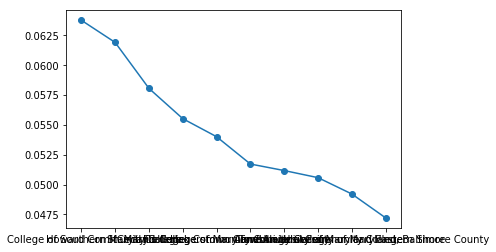

In [36]:
fp = _x2['%_x2']
inst = _x2['Institution']
plt.plot(inst,fp,marker="o")

In [37]:
_tui['avg'] = _tui[['FY 17', 'FY 18' , 'FY 19' , 'FY 20' , 'FY 21' ]].mean(axis=1)/100
_tui["1yr Change"] = pd.to_numeric(_tui["1yr Change"])
_tui["5yr Change"] = pd.to_numeric(_tui["5yr Change"])
_tui = _tui.sort_values(by="avg", ascending=True, inplace=False, na_position='last')
_tui = set_index(_tui, True, True, 1)
_tui.head()

,Institution,FY 17,FY 18,FY 19,FY 20,FY 21,5yr AVG,1yr Change,5yr Change,avg
1,Wor-Wic Community College,123,125,135,139,146,13360.00%,0.50%,18.70%,133.60%
2,Hagerstown Community College,131,133,136,143,139,13640.00%,-2.80%,6.10%,136.40%
3,Baltimore City Community College,135,133,133,140,146,13740.00%,4.20%,8.40%,137.40%
4,Anne Arundel Community College,134,137,139,143,147,14000.00%,3.00%,10.00%,140.00%
5,Garrett College,135,141,146,149,142,14260.00%,-4.70%,5.20%,142.60%


In [9]:
_tui = _tui.sort_values(by="5yr Change", ascending=True, inplace=False, na_position='last')
_tui.reset_index(drop=True, inplace=True)
_tui.index += 1    
_tui.head(13)

,Institution,FY 17,FY 18,FY 19,FY 20,FY 21,Unnamed: 6,1yr Change,5yr Change,Unnamed: 9,Unnamed: 10,avg
1,Prince George's Community College,152,157,157,157,154,15540.00%,-1.70%,1.50%,nan%,"{label:'Prince George's Community College',y:0...",15540.00%
2,Cecil College,157,159,150,155,159,15600.00%,2.60%,1.50%,nan%,"{label:'Cecil College',y:0.015},",15600.00%
3,Community College of Baltimore County,160,163,163,166,167,16380.00%,0.50%,4.10%,nan%,{label:'Community College of Baltimore County'...,16380.00%
4,Garrett College,135,141,146,149,142,14260.00%,-4.70%,5.20%,nan%,"{label:'Garrett College',y:0.052},",14260.00%
5,Hagerstown Community College,131,133,136,143,139,13640.00%,-2.80%,6.10%,nan%,"{label:'Hagerstown Community College',y:0.061},",13640.00%
6,Chesapeake College,151,154,159,162,162,15760.00%,0.20%,7.10%,nan%,"{label:'Chesapeake College',y:0.071},",15760.00%
7,Carroll Community College,160,163,163,166,172,16480.00%,3.50%,7.20%,nan%,"{label:'Carroll Community College',y:0.072},",16480.00%
8,Montgomery College,163,166,173,177,177,17120.00%,-0.20%,8.30%,nan%,"{label:'Montgomery College',y:0.083},",17120.00%
9,Baltimore City Community College,135,133,133,140,146,13740.00%,4.20%,8.40%,nan%,"{label:'Baltimore City Community College',y:0....",13740.00%
10,Howard Community College,156,162,164,166,170,16360.00%,2.20%,8.60%,nan%,"{label:'Howard Community College',y:0.086},",16360.00%


In [11]:
cm = sns.light_palette("green", as_cmap=True)
dem_perc = set_index(dem_perc.sort_values(by="Students", ascending=False, inplace=False, na_position='last'), True, True, 1)
dem_perc.style.background_gradient(cmap=cm)

,Institution,INST,Students,%hsp,%blk,%ntv,%npi,%asn,%wht,%_x2,%nra,%unk,%m,%f
1,University of Maryland Global Campus,4Y,58281,0.131964,0.284964,0.00471852,0.00674319,0.0514404,0.361421,0.0432216,0.0168666,0.0986599,0.529761,0.470239
2,"University of Maryland, College Park",4Y,40743,0.0805783,0.106153,0.00100631,0.000662691,0.15291,0.455195,0.0391724,0.123432,0.0408905,0.516948,0.483052
3,Johns Hopkins University,IND,27079,0.0875956,0.0760368,0.00155102,0.00110787,0.143137,0.40681,0.0388493,0.206655,0.0382584,0.464493,0.535507
4,Towson University,4Y,22709,0.0799683,0.227927,0.000880708,0.000704566,0.0642477,0.526399,0.0511691,0.0208287,0.0278744,0.385354,0.614646
5,Montgomery College,CC,21260,0.254845,0.262559,0.00296331,0.00258702,0.116745,0.219849,0.033396,0.102775,0.00428034,0.460818,0.539182
6,Community College of Baltimore County,CC,17732,0.0605121,0.376438,0.00366569,0.00248139,0.0619783,0.380555,0.0408301,0.0626551,0.0108843,0.376438,0.623562
7,"University of Maryland, Baltimore County",4Y,13602,0.0757242,0.178136,0.00147037,0.00132333,0.193942,0.391045,0.0471989,0.0861638,0.0249963,0.543964,0.456036
8,Anne Arundel Community College,CC,12655,0.0934018,0.169182,0.00323983,0.00142236,0.0449625,0.552351,0.0505729,0.0160411,0.0688266,0.402924,0.597076
9,Prince George's Community College,CC,11788,0.135392,0.687564,0.00271463,0.00118765,0.0441127,0.0365626,0.0337631,0.0383441,0.0203597,0.37131,0.62869
10,Howard Community College,CC,9110,0.111087,0.294292,0.00219539,0.001427,0.11899,0.313831,0.06191,0.0554336,0.0408342,0.417563,0.582437


In [12]:
en = sns.light_palette("blue", as_cmap=True)
_enr =  set_index(_enr.sort_values(by="20tft%", ascending=False, inplace=False, na_position='last'), True, True, 1)
enr_avg = _enr.mean(axis=1)
enr_avg.head()
#_enr = _enr.append(enr_avg, ignore_index = True)
#_enr.style.background_gradient(cmap=en)

1    190942.00%
2    115325.00%
3    317605.00%
4    353310.00%
5   1209800.00%
dtype: float64